Visualising house price data from land registry with python.

In [1]:
# Import libraries etc
%matplotlib inline
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import time

In [2]:
pd.options.display.mpl_style = 'default'
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 16
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0

/Users/charliedickens/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
# Load in the land registry data table (I added a header row)
fullData = pd.read_csv('./data/ppd_data.csv', parse_dates=True, dayfirst = True, header=0, index_col="Date")
fullData.head()

,ID,Price,Postcode,Type,New,Duration,Flat/Apartment Number,Street Number,Street,Town,City,City2,County,Unsure,URL
Date,,,,,,,,,,,,,,,
2017-09-29,5CF9903C-B136-7F13-E053-6C04A8C074B1,130000,B1 1BA,F,N,L,APARTMENT 2309,"BEETHAM TOWER, 10",HOLLOWAY CIRCUS QUEENSWAY,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,http://landregistry.data.gov.uk/data/ppi/trans...
2017-04-07,4E95D758-346E-EDA1-E050-A8C0630539E2,1680000,B1 1BL,O,N,L,NaN,71 - 79,JOHN BRIGHT STREET,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,http://landregistry.data.gov.uk/data/ppi/trans...
2017-06-27,55BDCAE6-F157-521D-E053-6B04A8C0DD7A,164000,B1 1BY,F,N,L,APARTMENT 2901,10,HOLLOWAY CIRCUS QUEENSWAY,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,http://landregistry.data.gov.uk/data/ppi/trans...
2017-07-28,582D0637-BB5E-8F22-E053-6C04A8C01BAC,239000,B1 1BY,F,N,L,APARTMENT 3305,10,HOLLOWAY CIRCUS QUEENSWAY,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A,http://landregistry.data.gov.uk/data/ppi/trans...
2017-02-13,55BDCAE6-F15C-521D-E053-6B04A8C0DD7A,130000,B1 1BY,F,N,L,APARTMENT 3501,10,HOLLOWAY CIRCUS QUEENSWAY,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,http://landregistry.data.gov.uk/data/ppi/trans...


In [60]:
columnsToDrop = ['ID', 'Flat/Apartment Number', "City", 'City2', "Unsure", 'County','URL']
# I also know there are some nans in the postcode field, so lets drop these
cropData = fullData.drop(columnsToDrop,1).dropna(subset=['Postcode'])

In [61]:
cropData.head()

,Price,Postcode,Type,New,Duration,Street Number,Street,Town
Date,,,,,,,,
2017-09-29,130000,B1 1BA,F,N,L,"BEETHAM TOWER, 10",HOLLOWAY CIRCUS QUEENSWAY,NaN
2017-04-07,1680000,B1 1BL,O,N,L,71 - 79,JOHN BRIGHT STREET,NaN
2017-06-27,164000,B1 1BY,F,N,L,10,HOLLOWAY CIRCUS QUEENSWAY,NaN
2017-07-28,239000,B1 1BY,F,N,L,10,HOLLOWAY CIRCUS QUEENSWAY,NaN
2017-02-13,130000,B1 1BY,F,N,L,10,HOLLOWAY CIRCUS QUEENSWAY,NaN


In [62]:
cropData.shape

(10735, 8)

## Preliminary statistics
We can do some initial plotting and analysis just to check how the data looks.

In [65]:
print('Average price paid in 2017 = £ %d' % np.mean(cropData['Price']))
print('Median price paid in 2017  = £ %d' % np.median(cropData['Price']))

Average price paid in 2017 = £ 246285
Median price paid in 2017  = £ 157000


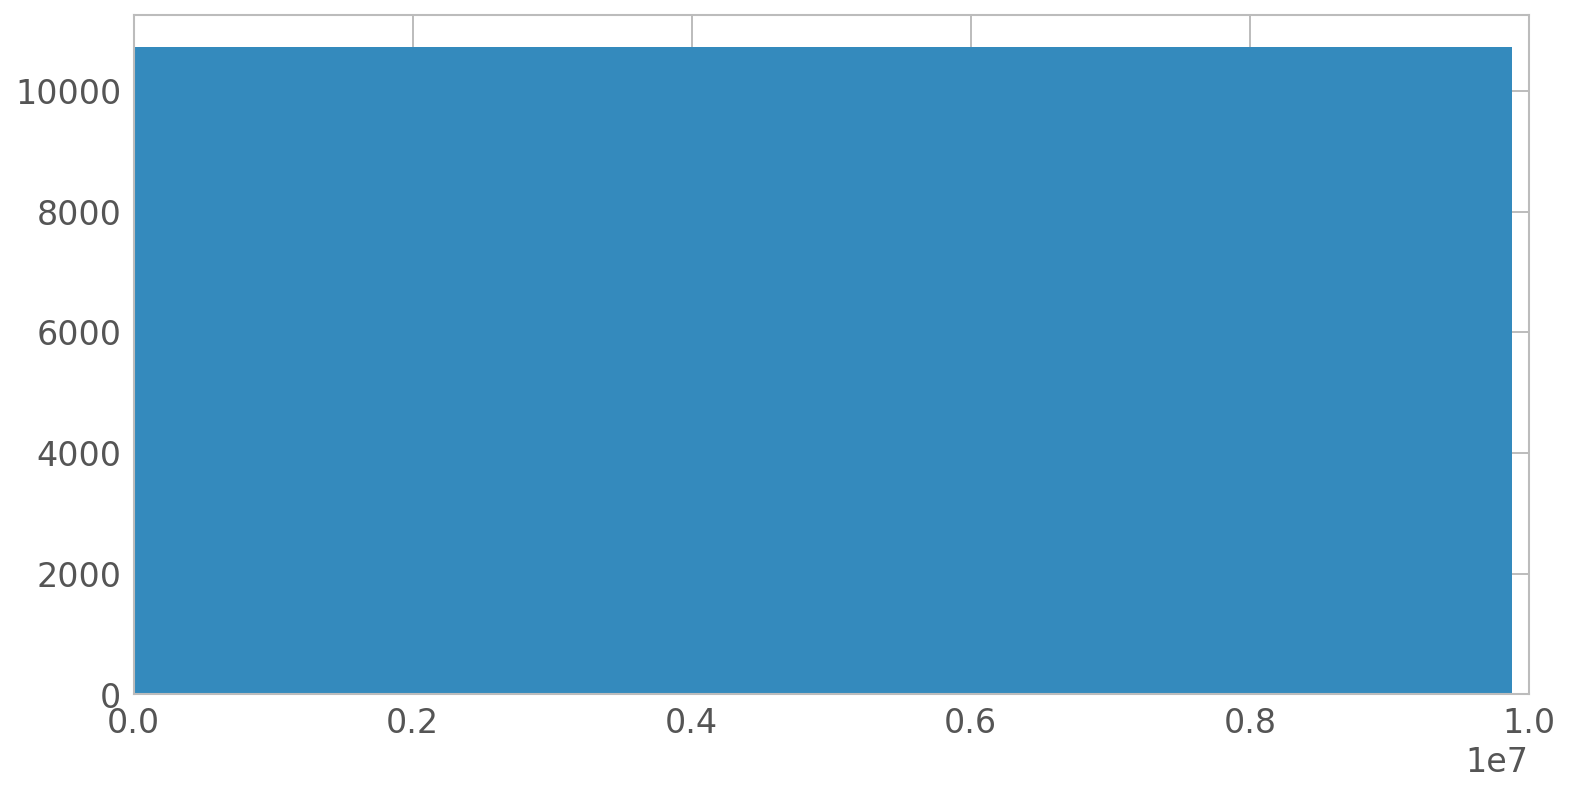

In [82]:
plt.hist(cropData['Price'], bins=10)
plt.xlim([0, 1e7])
#plt.xlabel('Purchase price (Pounds)')
#plt.ylabel('Frequency')
plt.show()

In [73]:
np.max(cropData['Price'])

98765391

In [74]:
np.min(cropData['Price'])

240

In [76]:
cropData['Price'].idxmax()

Timestamp('2017-02-09 00:00:00')

In [79]:
cropData['Price'].max()

98765391

Something funny seems to be happening with the outlying points of low and high value so let us just keep houses in the 'sensible' range of £10,000 to £5,000,000 (initially).

In [84]:
smallData = cropData[(cropData['Price'] >= 10000) & (cropData['Price'] <= 5000000)]

(array([  1.03170000e+04,   2.82000000e+02,   4.20000000e+01,
          1.60000000e+01,   1.10000000e+01,   2.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([   10000.,   509000.,  1008000.,  1507000.,  2006000.,  2505000.,
         3004000.,  3503000.,  4002000.,  4501000.,  5000000.]),
 <a list of 10 Patch objects>)

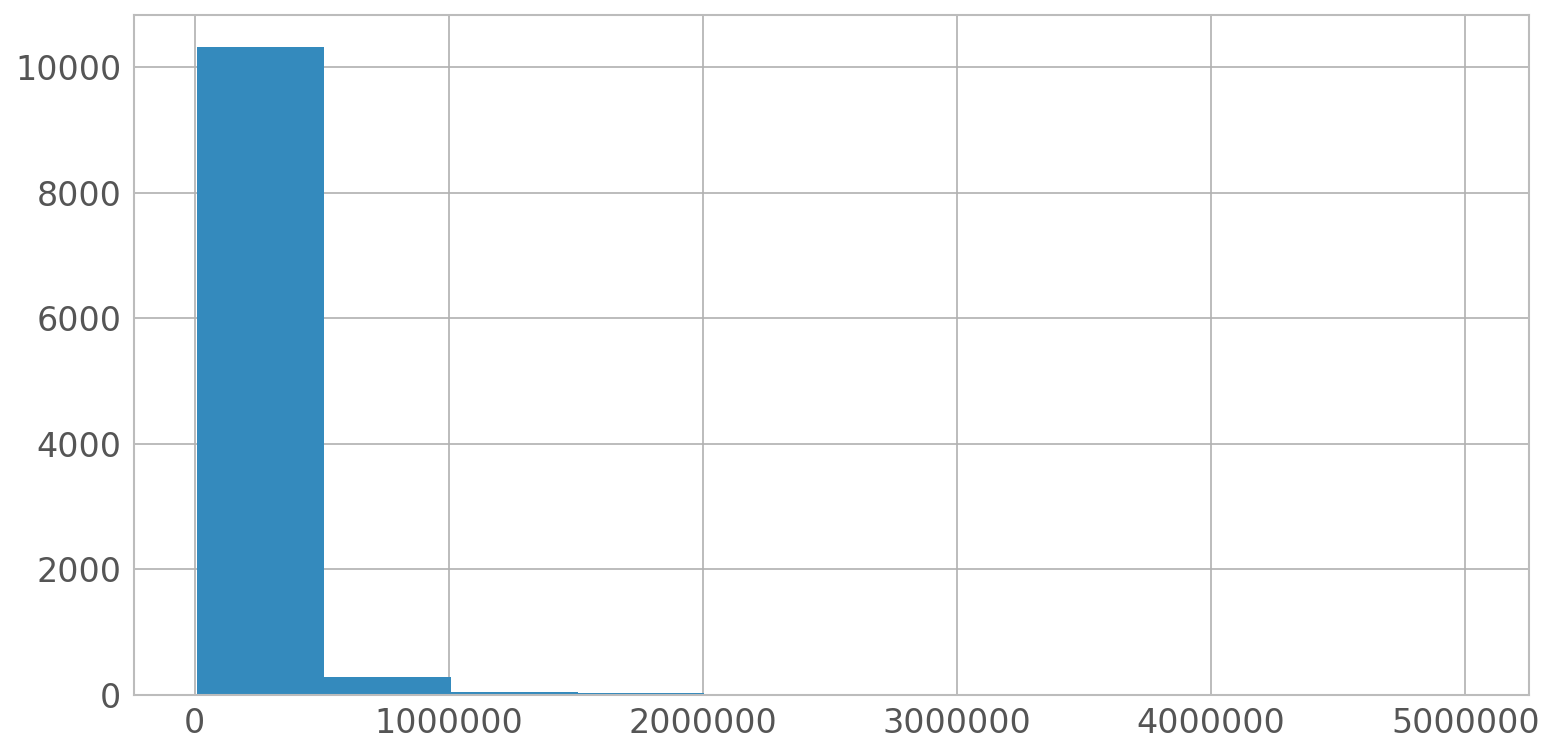

In [85]:
plt.hist(smallData['Price'], bins=10)

Again seems like there are not many properties exceedgin £2.5M so let us cut off there instead.

In [86]:
smallData = cropData[(cropData['Price'] >= 10000) & (cropData['Price'] <= 2500000)]

(array([  2.31000000e+02,   1.54400000e+03,   3.67900000e+03,
          2.30700000e+03,   1.13800000e+03,   6.17000000e+02,
          3.37000000e+02,   2.45000000e+02,   1.20000000e+02,
          9.90000000e+01,   6.30000000e+01,   5.00000000e+01,
          4.40000000e+01,   3.90000000e+01,   2.90000000e+01,
          2.10000000e+01,   1.30000000e+01,   6.00000000e+00,
          7.00000000e+00,   1.00000000e+01,   6.00000000e+00,
          1.00000000e+01,   2.00000000e+00,   5.00000000e+00,
          1.00000000e+00,   9.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

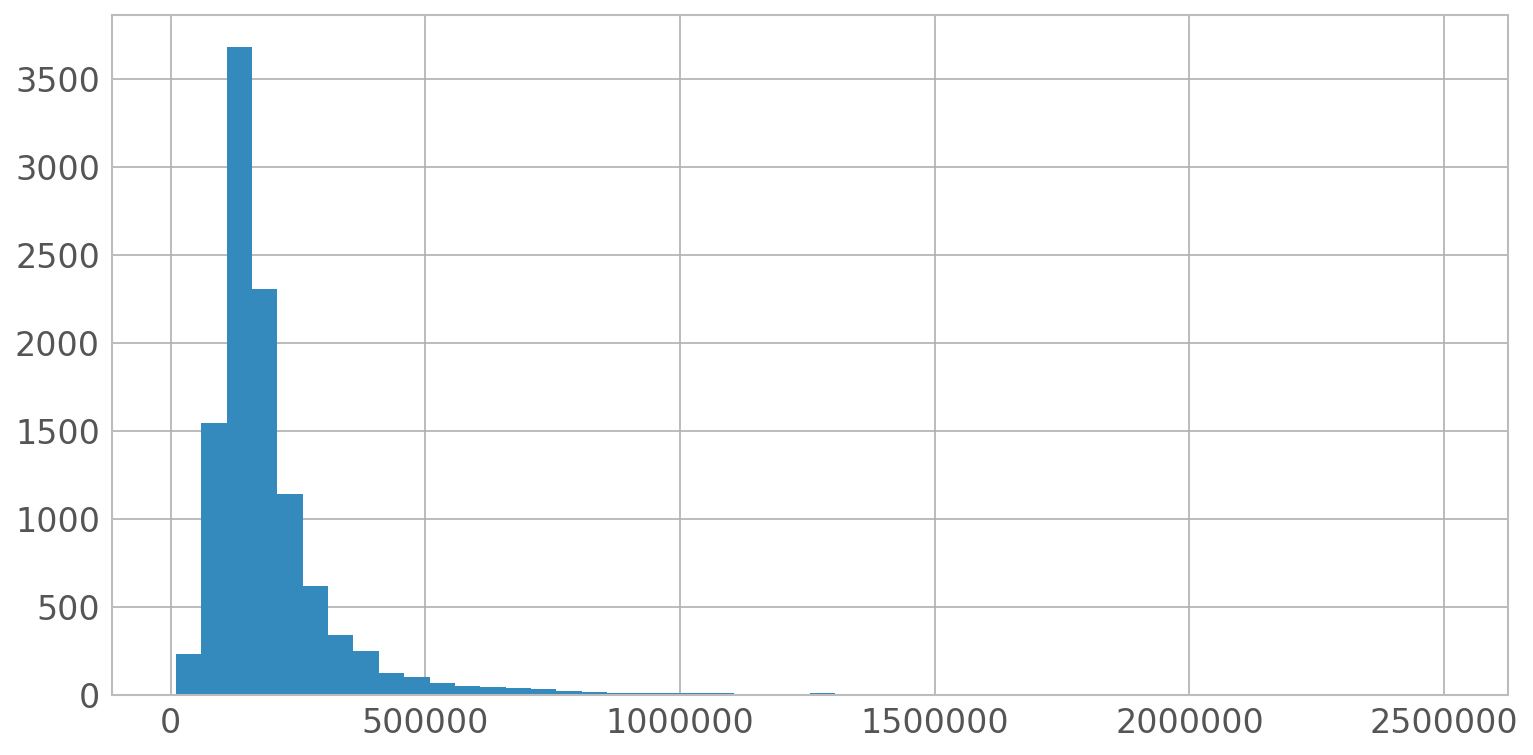

In [90]:
plt.hist(smallData['Price'], bins=50)

In [91]:
# crop again at £1.5M
smallData = cropData[(cropData['Price'] >= 10000) & (cropData['Price'] <= 1500000)]

(array([  8.20000000e+01,   2.81000000e+02,   8.60000000e+02,
          1.94700000e+03,   2.15600000e+03,   1.67100000e+03,
          9.95000000e+02,   6.18000000e+02,   5.21000000e+02,
          3.36000000e+02,   2.39000000e+02,   1.80000000e+02,
          1.48000000e+02,   1.07000000e+02,   5.10000000e+01,
          6.70000000e+01,   5.80000000e+01,   4.10000000e+01,
          2.70000000e+01,   3.00000000e+01,   3.10000000e+01,
          2.40000000e+01,   2.30000000e+01,   2.10000000e+01,
          1.90000000e+01,   1.60000000e+01,   1.40000000e+01,
          8.00000000e+00,   5.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          9.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   7.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
        

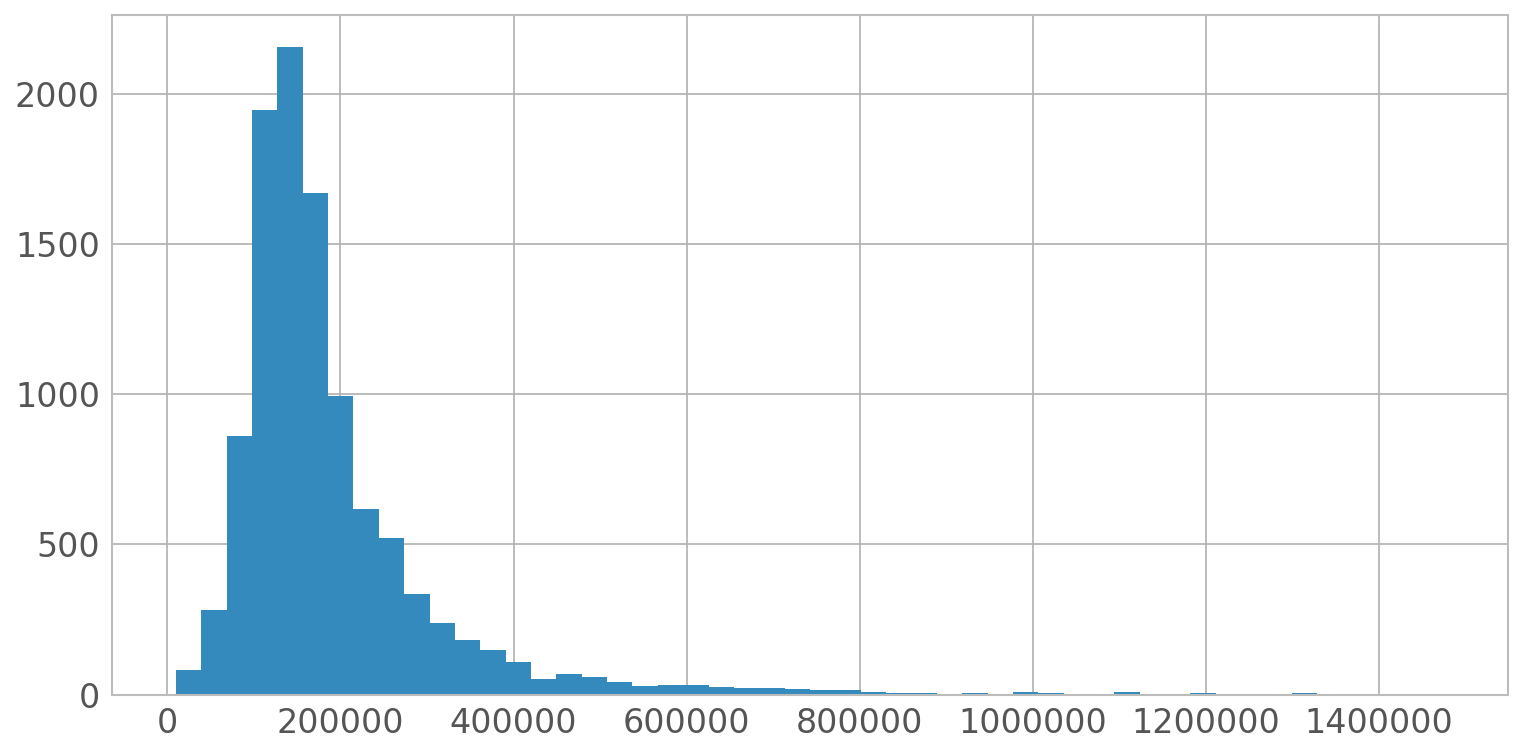

In [92]:
plt.hist(smallData['Price'], bins=50)

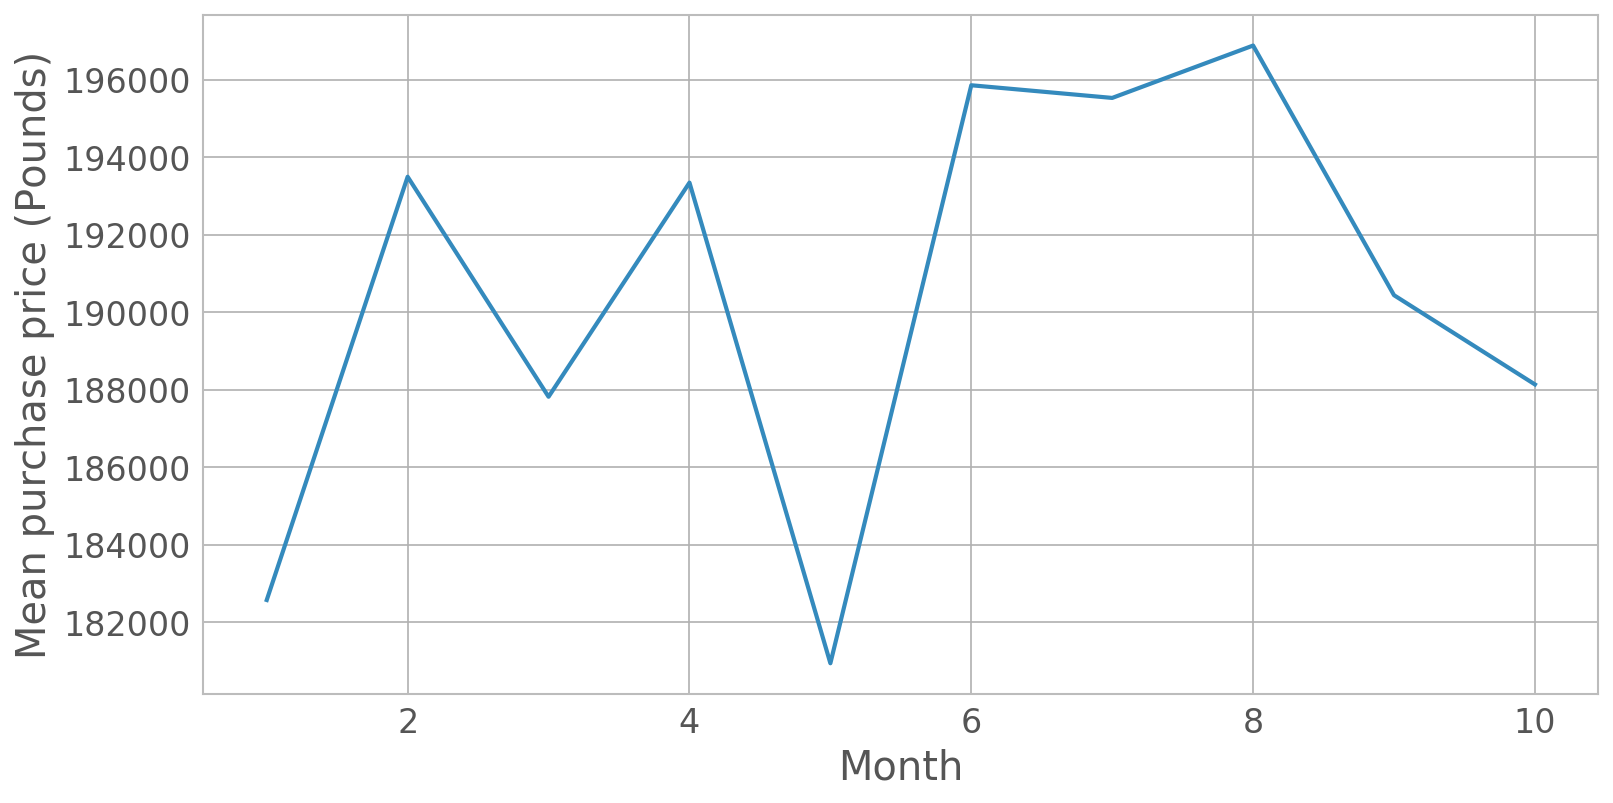

In [94]:
monthMeans = smallData['Price'].groupby(smallData.index.month).aggregate(np.mean)
plt.plot(monthMeans)
plt.xlabel('Month')
plt.ylabel('Mean purchase price (Pounds)')
plt.show()

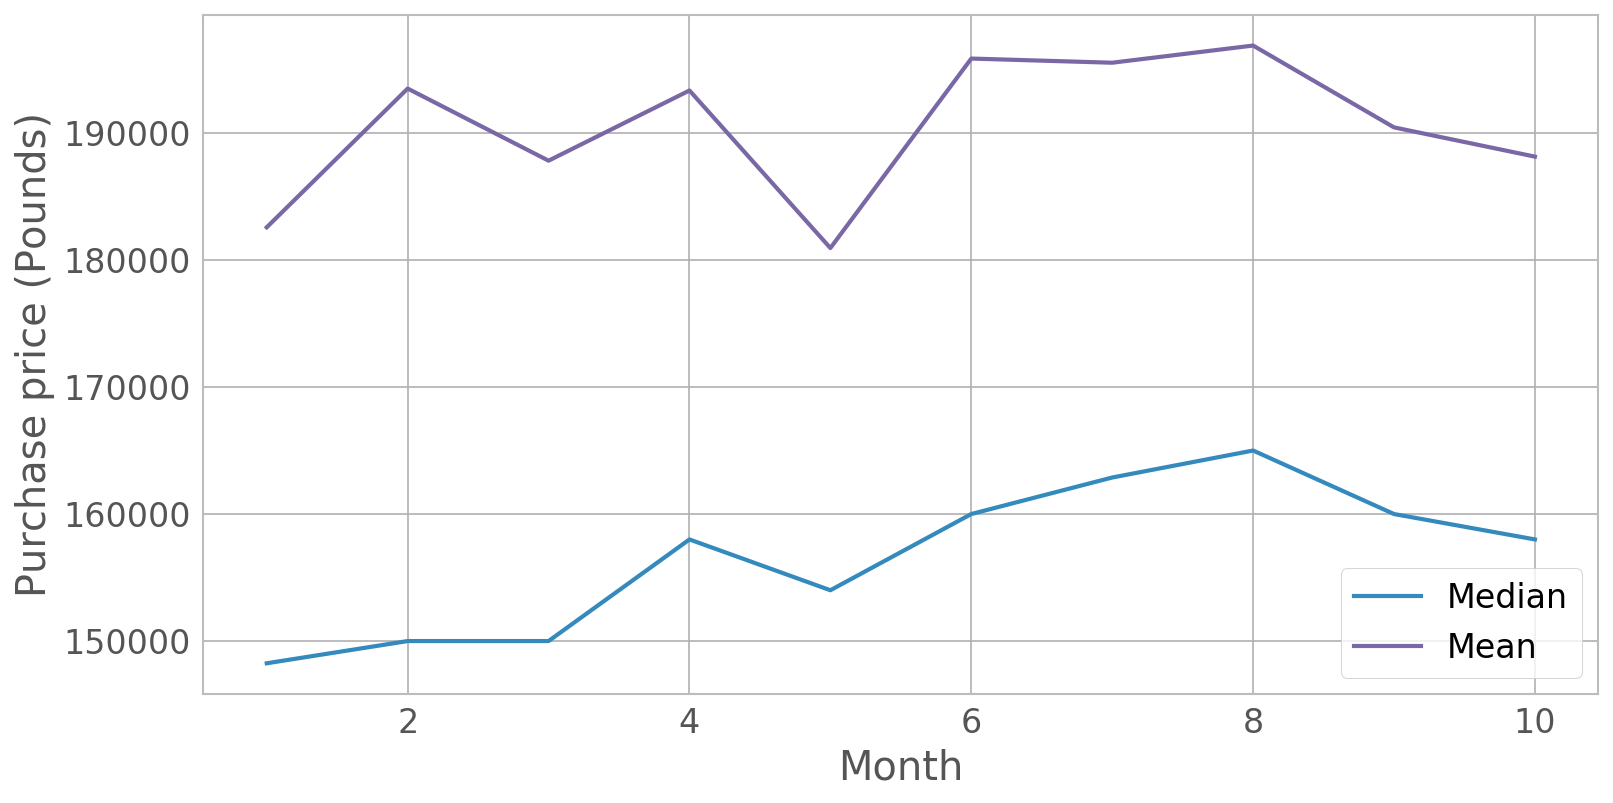

In [98]:
monthMedians = smallData['Price'].groupby(smallData.index.month).aggregate(np.median)
plt.plot(monthMedians, label="Median")
plt.plot(monthMeans, label="Mean")
plt.xlabel('Month')
plt.ylabel('Purchase price (Pounds)')
plt.legend()
plt.show()

/Users/charliedickens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/charliedickens/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


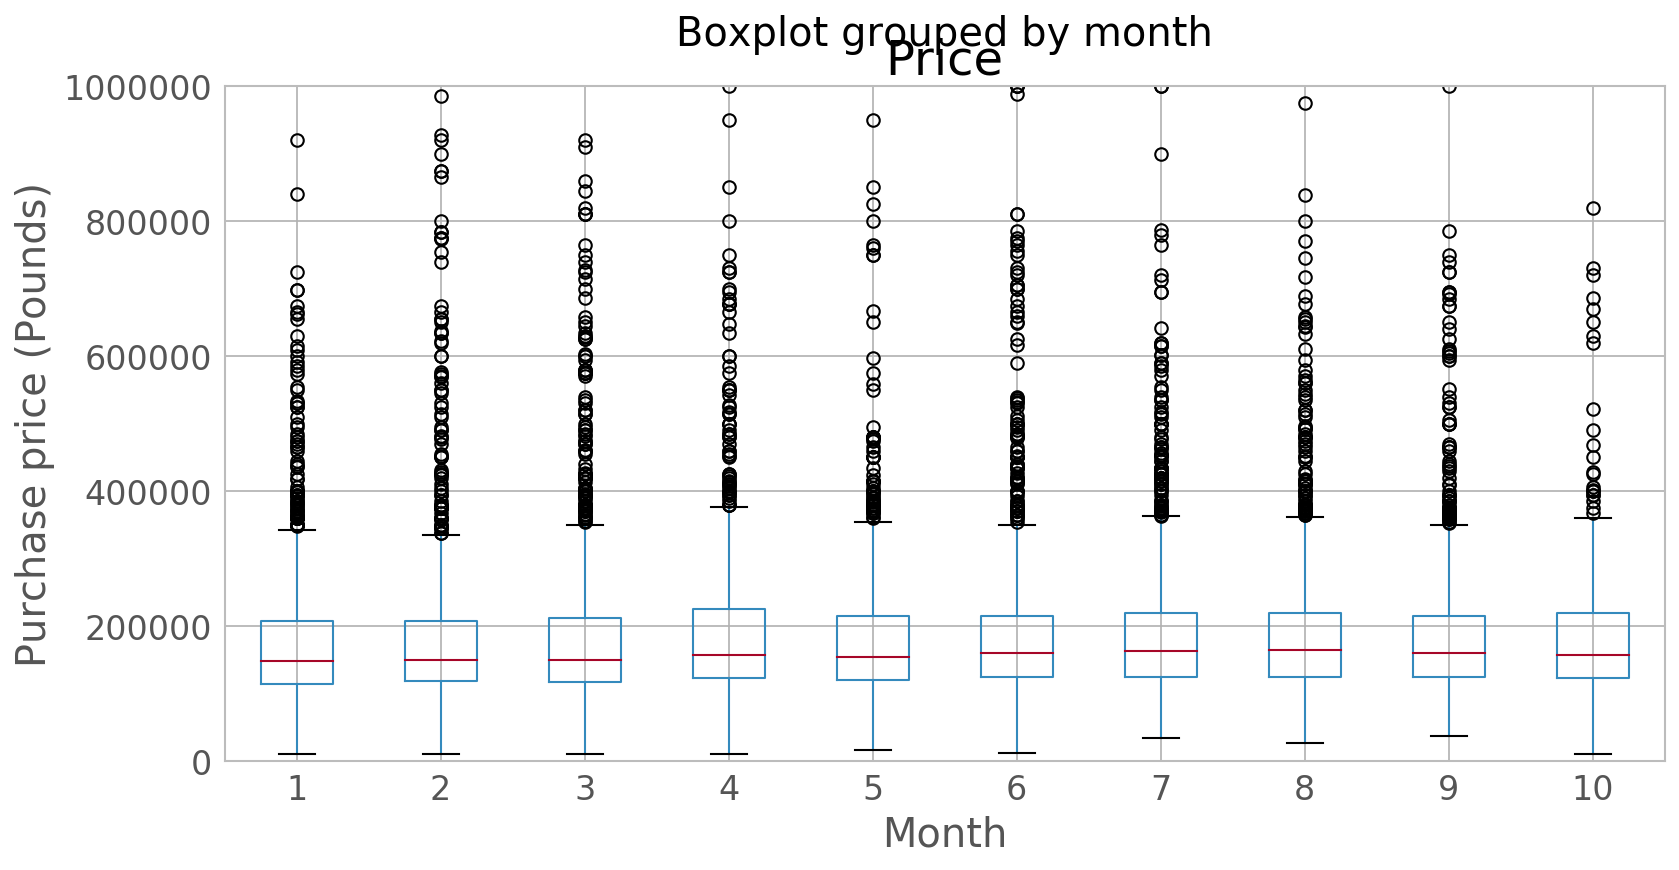

In [101]:
smallData['month'] = smallData.index.month
smallData.boxplot(column='Price',by='month')
plt.ylim((0, 1000000))
plt.xlabel('Month')
plt.ylabel('Purchase price (Pounds)')
plt.show()

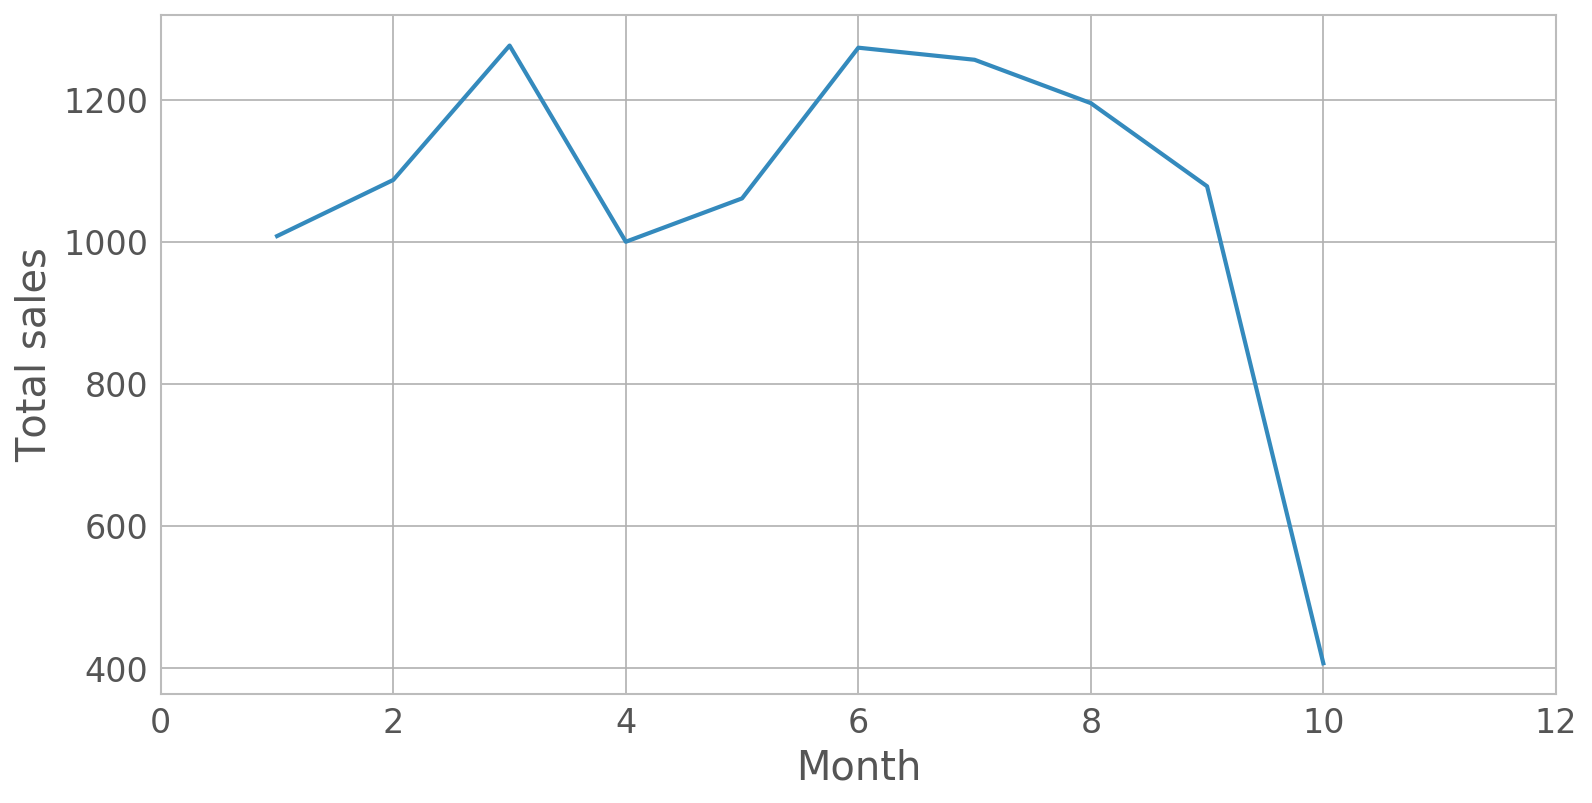

In [104]:
saleCount = smallData['Price'].groupby(smallData.index.month).aggregate(len)
plt.plot(saleCount)
#plt.ylim([0, 500])
plt.xlim([0,12])
plt.xlabel('Month')
plt.ylabel('Total sales')
plt.show()

###  Location data
With the list of postcodes we are in a position to start looking at location data and plotting on maps.  There is an API at Postcodes.io which we can learn how to use.

In [106]:
import requests
import json
 
## Practice on a couple of postcodes
# Form the request
url = 'http://api.postcodes.io/postcodes'
payload = {'postcodes' : ['OX49 5NU', 'M32 0JG'] } # Example postcodes
headers = {'content-type': 'application/json'}
 
# Make the request
r = requests.post(url, data=json.dumps(payload),  headers=headers)
returnData = r.json()
 
# Print out the result, with some nicer formatting
print(json.dumps(returnData, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "result": [
        {
            "query": "OX49 5NU",
            "result": {
                "admin_county": "Oxfordshire",
                "admin_district": "South Oxfordshire",
                "admin_ward": "Chalgrove",
                "ccg": "NHS Oxfordshire",
                "codes": {
                    "admin_county": "E10000025",
                    "admin_district": "E07000179",
                    "admin_ward": "E05009735",
                    "ccg": "E38000136",
                    "nuts": "UKJ14",
                    "parish": "E04008109",
                    "parliamentary_constituency": "E14000742"
                },
                "country": "England",
                "eastings": 464447,
                "european_electoral_region": "South East",
                "incode": "5NU",
                "latitude": 51.6559271444373,
                "longitude": -1.06977254466896,
                "lsoa": "South Oxfordshire 011B",
                "msoa": "South Oxfordshire 

Given the easy case we can now extend this to the full dataset.

In [110]:
postcodes = smallData['Postcode']
queryCodes = postcodes.tolist()
# We can only request 100 postcodes at a time
maxPostcodes = 100
nQueries = np.ceil(float(len(queryCodes))/maxPostcodes)
print('%d postcodes, requiring %d requests' % (len(queryCodes), nQueries))

# Assmble parts of the request which are constant
url = 'http://api.postcodes.io/postcodes'
headers = {'content-type': 'application/json'}

lats, longs = [], []

for iQuery in range(int(nQueries)):
    
    # Assemble the postcode query
    minQuery = iQuery*maxPostcodes
    maxQuery = min(((iQuery+1)*maxPostcodes,len(queryCodes)))
    
    payload = {'postcodes' : queryCodes[minQuery:maxQuery] }
 
    # Make the request
    r = requests.post(url, data=json.dumps(payload),  headers=headers)
    # Lets give the server a rest as it seems to get stressed
    time.sleep(0.1)
    if r.status_code is 200:
        returnData = r.json()
        sys.stdout.write('.')
    else:
        print('Query failed, status: %d' % r.status_code)
 
    result = returnData['result']
    # Lets comprehend the list to get the lat and log data
    # We need an if statement to catch cases where the postcode cant be found
    lats += [ result[idx]['result']['latitude'] if result[idx]['result'] is not None else np.nan for idx in range(len(result)) ]
    longs += [ result[idx]['result']['longitude'] if result[idx]['result'] is not None else np.nan for idx in range(len(result)) ]
 
print("Finished queries")

10641 postcodes, requiring 107 requests
...........................................................................................................Finished queries


Now we have  geodata we can begin plotting it on the map.  Use Stamen MapStack to generate the map image.

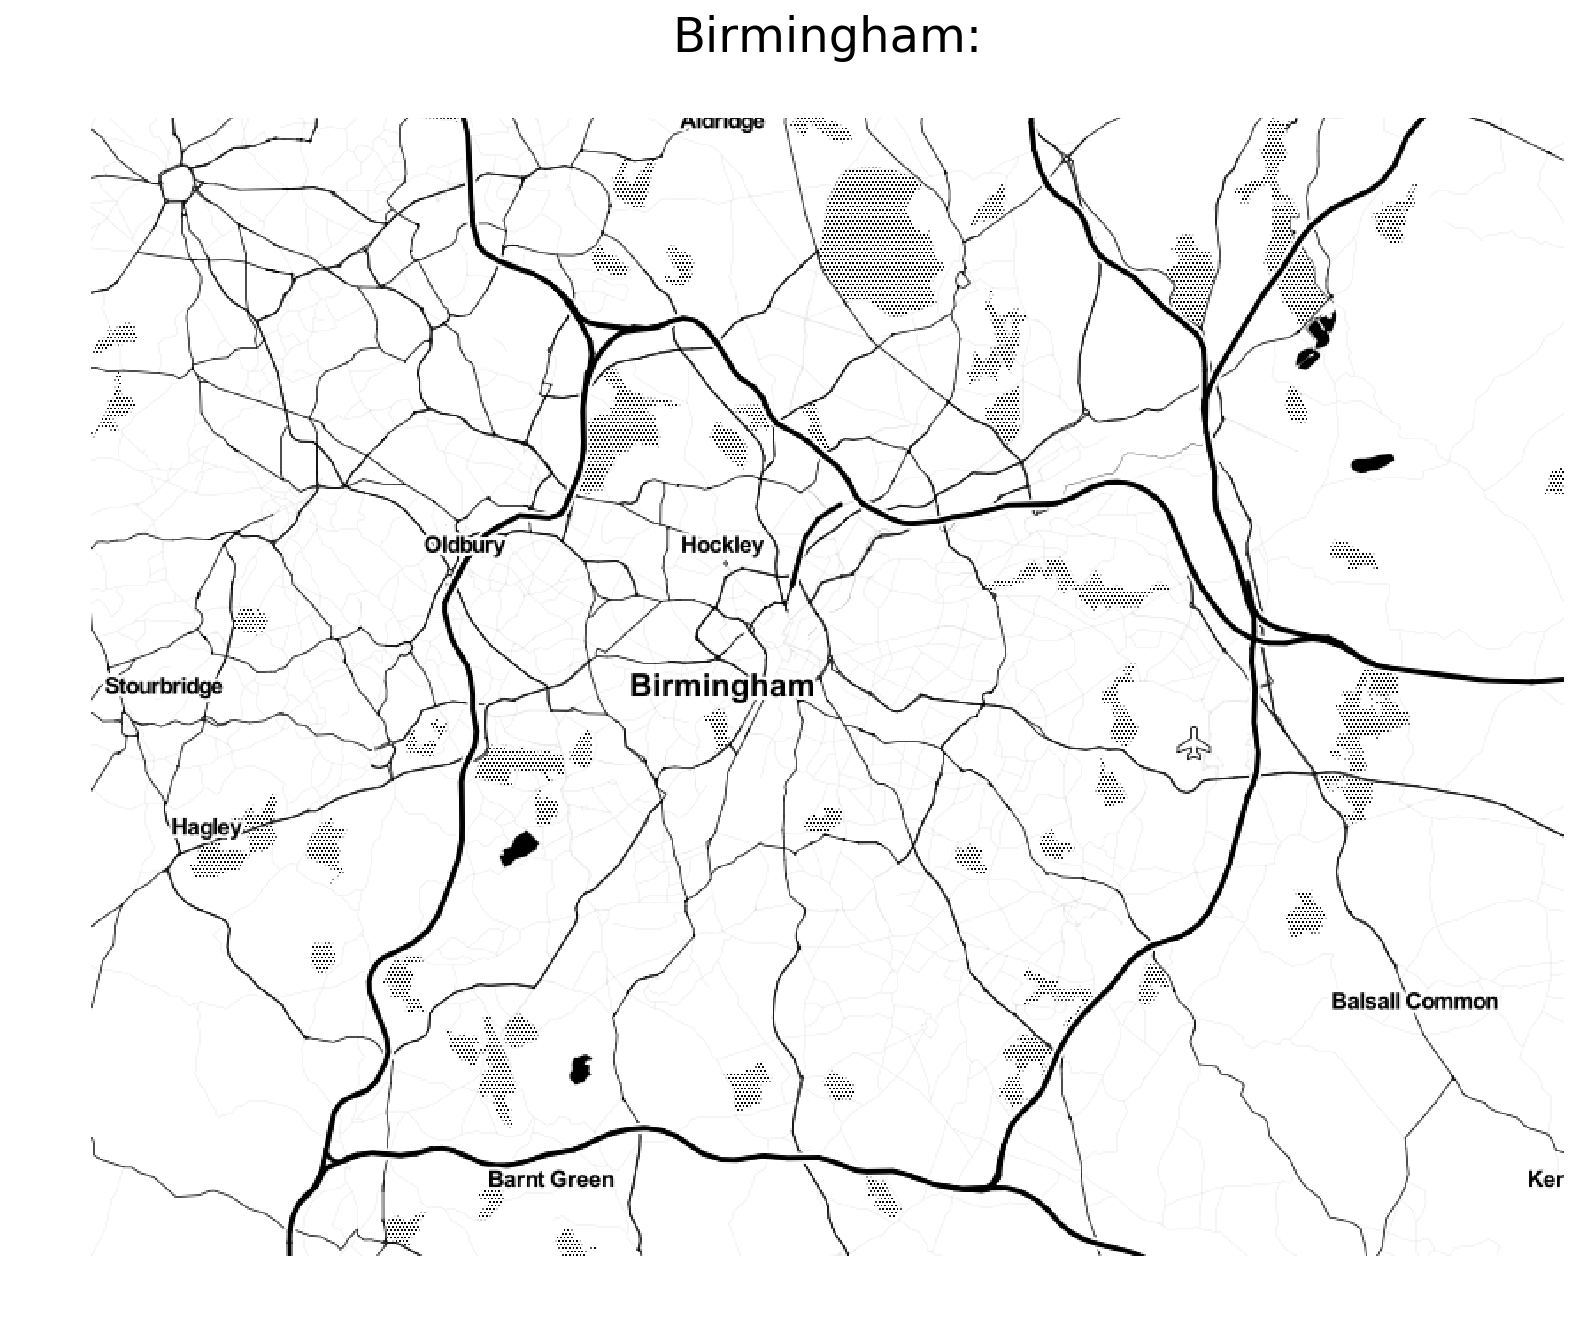

In [114]:

im=plt.imread('./maps/birmingham.png')
mapFac = 1.5
plt.figure(figsize = (mapFac*9.98, mapFac*6.7))
plt.imshow(im)
plt.axis('off')
plt.title('Birmingham:\n')
plt.show()

In [115]:
def getTileNumber(lat,lon,zoom):
    
    xtile =  (lon+180)/360 * 2**zoom  ;
    ytile =  (1 - np.log(np.tan(np.radians(lat)) + 1/np.cos(np.radians(lat)))/np.pi)/2 * 2**zoom 
    return (xtile, ytile)
 
 
def getLonLat(xtile, ytile, zoom):
    n = 2 ** zoom
    lon_deg = xtile / n * 360.0 - 180.0
    lat_deg = np.degrees(np.arctan(np.sinh(np.pi * (1 - 2 * ytile / n))))
    return (lon_deg, lat_deg)
 
def latLon2Box(lat, lon, zoom, width, height):
    
    tile_size = 256.0
 
    (xtile, ytile) = getTileNumber(lat, lon, zoom)
 
    xtile_s = (xtile * tile_size - width/2) / tile_size;
    ytile_s = (ytile * tile_size - height/2) / tile_size;
    xtile_e = (xtile * tile_size + width/2) / tile_size;
    ytile_e = (ytile * tile_size + height/2) / tile_size;
 
    (lon_s, lat_s) = getLonLat(xtile_s, ytile_s, zoom);
    (lon_e, lat_e) = getLonLat(xtile_e, ytile_e, zoom);
 
    return (lon_s, lat_s, lon_e, lat_e)
 
(lon_s, lat_s, lon_e, lat_e) = latLon2Box(52.206344321410604, 0.13166427612304688, 13, 998, 670)
 
from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=lon_s,llcrnrlat=lat_s,urcrnrlon=lon_e,urcrnrlat=lat_e,
            resolution='h',projection='merc')
x1,y1 = m(longs,lats)
 
xs, ys = m(lon_s, lat_s)
xe, ye = m(lon_e, lat_e)

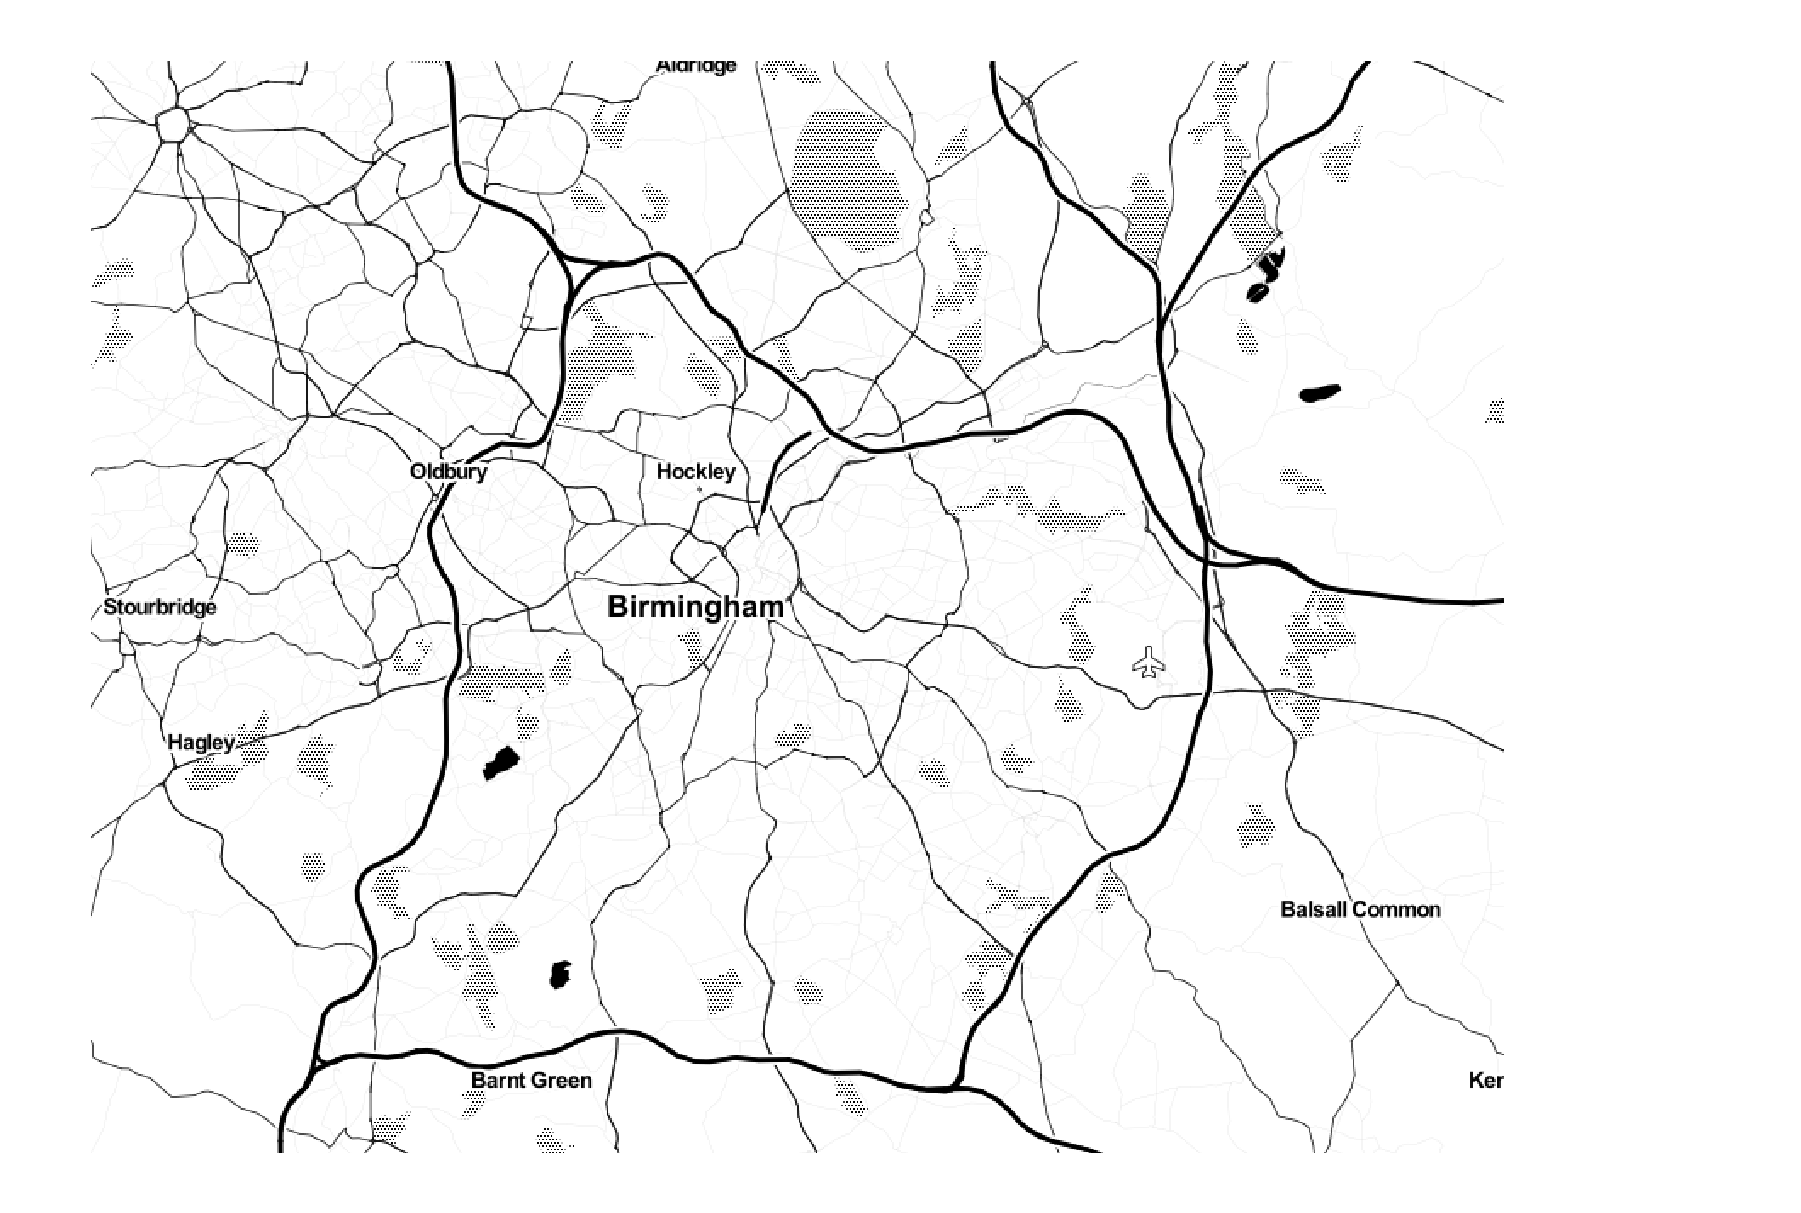

In [117]:

# Normalise to pixel co-ords
width = 998
height = 670
 
xPix = width*(np.array(x1) - xs)/(xe - xs)
yPix = height*(np.array(y1) - ys)/(ye - ys)
 
im=plt.imread('./maps/birmingham.png')
 
plt.figure(figsize = (mapFac*9.98, mapFac*6.7))
plt.imshow(np.flipud(im))
plt.plot(xPix,height-yPix,'o',markersize=5, markeredgecolor='none')
plt.xlim([0, width])
plt.ylim([0, height])
plt.axis('off')
plt.show()

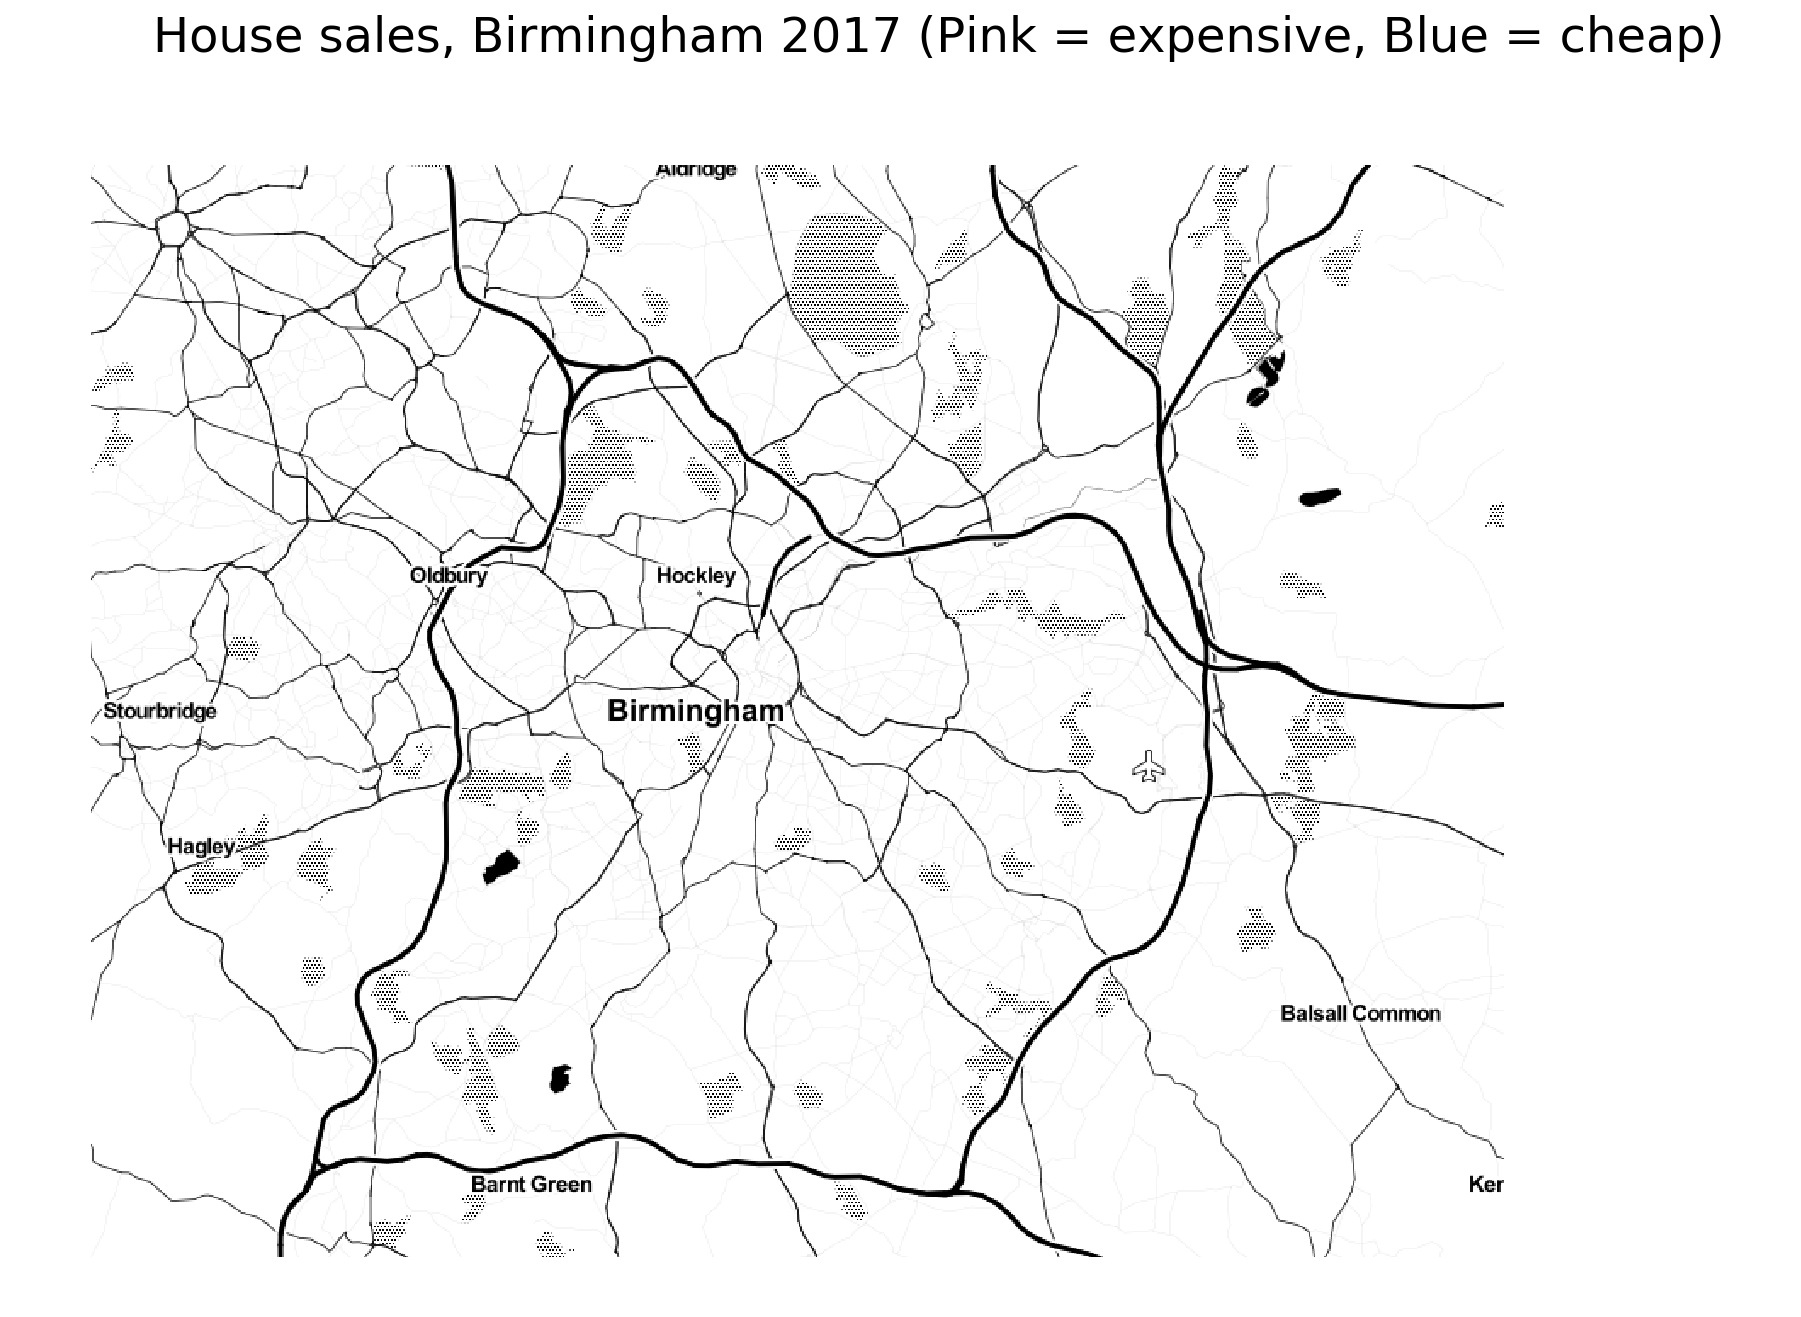

In [118]:
maxPrice = 600000.0
import matplotlib as mpl
 
price = smallData['Price']
price = price.tolist()
price = np.divide(price,maxPrice)
price[price>1] = 1
 
ditherMag = 10
 
fig = plt.figure(figsize = (mapFac*9.98, mapFac*6.7))
 
cmap = mpl.cm.cool
 
plt.imshow(np.flipud(im))
plt.scatter(xPix + ditherMag*(np.random.rand(xPix.size)-0.5),
            height - (yPix +ditherMag*(np.random.rand(yPix.size)-0.5)),
                      c=price, cmap=cmap, s=60)
plt.xlim([0, width])
plt.ylim([0, height])
plt.axis('off')
plt.title('House sales, Birmingham 2017 (Pink = expensive, Blue = cheap)\n')
plt.savefig('maps/price_map.jpg')